
--- Numeric Summary ---
       genai_importance  skill_integration  skill_learning  \
count        104.000000         104.000000      105.000000   
mean           2.846154           3.375000        3.733333   
std            1.290512           1.081059        1.111709   
min            1.000000           1.000000        1.000000   
25%            2.000000           3.000000        3.000000   
50%            3.000000           3.000000        4.000000   
75%            4.000000           4.000000        5.000000   
max            5.000000           5.000000        5.000000   

       simple_tasks_skills  complex_tasks_skills  skillfullness  \
count           105.000000            104.000000     105.000000   
mean              3.780952              4.057692       3.838095   
std               1.344368              1.022342       0.981794   
min               1.000000              1.000000       1.000000   
25%               3.000000              3.750000       3.000000   
50%           

/var/folders/vj/tz3h_nsd1mdc2f20mfbm_34w0000gn/T/ipykernel_17743/3073098090.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="gender", palette="Set2")


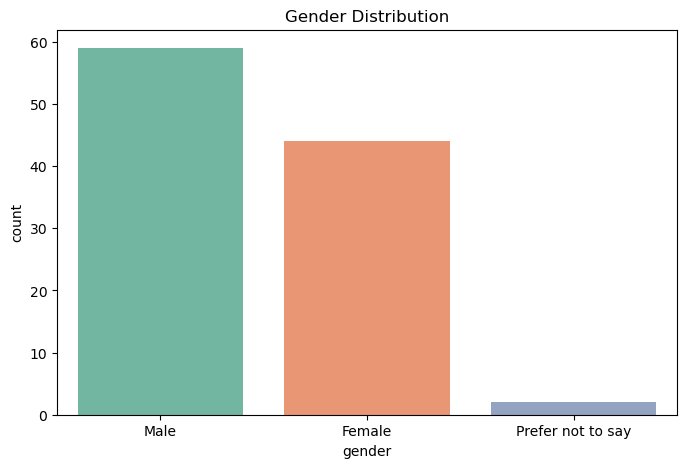

/var/folders/vj/tz3h_nsd1mdc2f20mfbm_34w0000gn/T/ipykernel_17743/3073098090.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="age_group", order=df["age_group"].value_counts().index, palette="Set3")


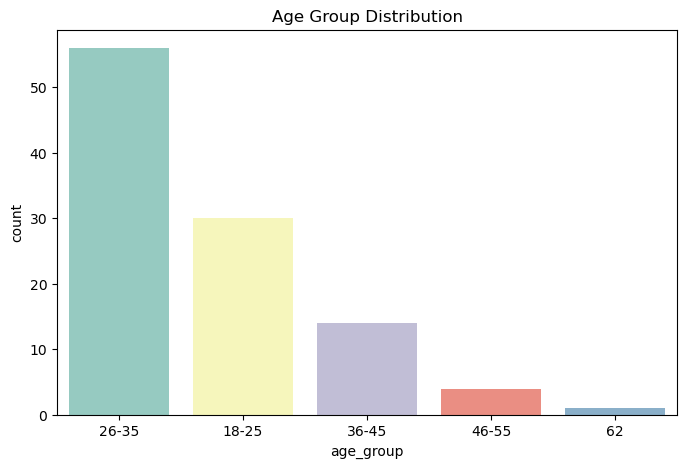

/var/folders/vj/tz3h_nsd1mdc2f20mfbm_34w0000gn/T/ipykernel_17743/3073098090.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="years_of_experience", order=df["years_of_experience"].value_counts().index, palette="Set1")


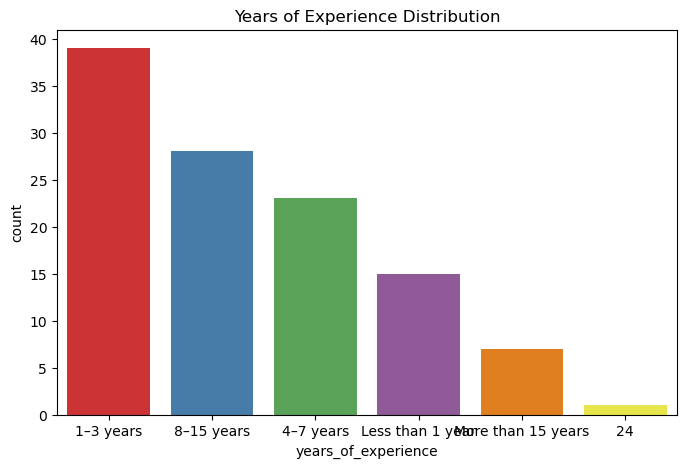

/var/folders/vj/tz3h_nsd1mdc2f20mfbm_34w0000gn/T/ipykernel_17743/3073098090.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="viridis")


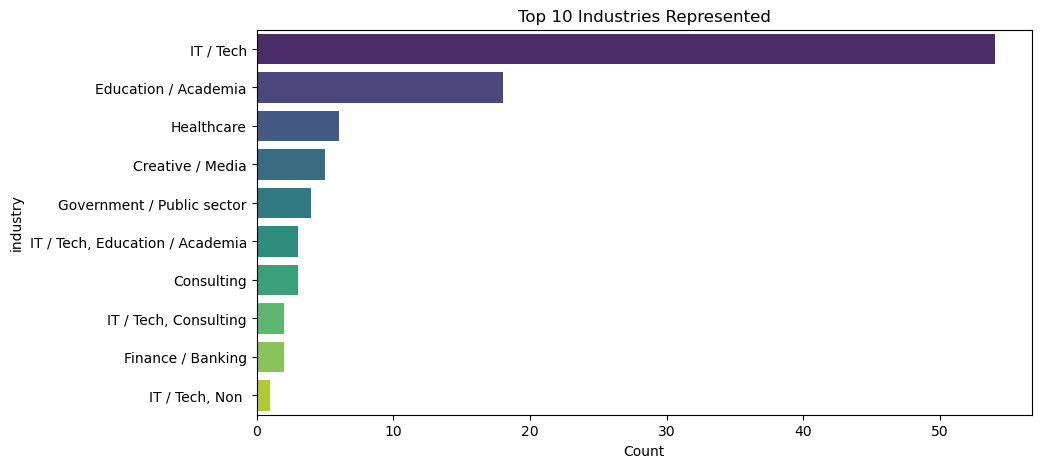

/var/folders/vj/tz3h_nsd1mdc2f20mfbm_34w0000gn/T/ipykernel_17743/3073098090.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


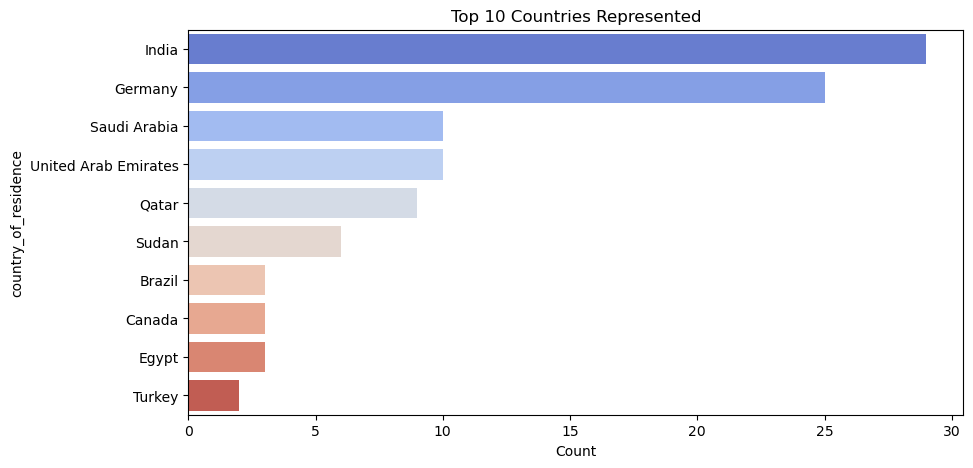

In [1]:
# --- 1. Load Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Load Dataset ---
df = pd.read_csv("/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# --- 3. Basic Summary ---
print("\n--- Numeric Summary ---")
print(df.describe())

print("\n--- Categorical Breakdowns ---")
for col in ["employment_status", "industry", "years_of_experience", "age_group", "gender",
            "highest_level_of_education", "country_of_residence"]:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

# --- 4. Demographic Visualizations ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="gender", palette="Set2")
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="age_group", order=df["age_group"].value_counts().index, palette="Set3")
plt.title("Age Group Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="years_of_experience", order=df["years_of_experience"].value_counts().index, palette="Set1")
plt.title("Years of Experience Distribution")
plt.show()

plt.figure(figsize=(10,5))
top_industries = df["industry"].value_counts().head(10)
sns.barplot(x=top_industries.values, y=top_industries.index, palette="viridis")
plt.title("Top 10 Industries Represented")
plt.xlabel("Count")
plt.show()

plt.figure(figsize=(10,5))
top_countries = df["country_of_residence"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries Represented")
plt.xlabel("Count")
plt.show()


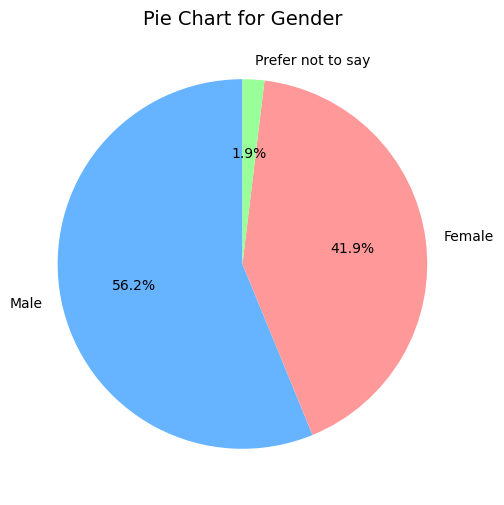

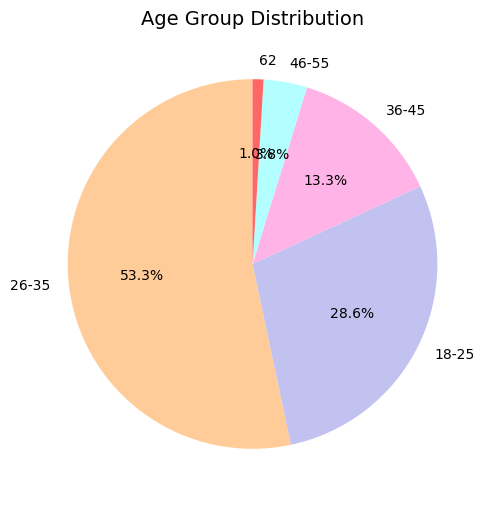

In [9]:
import matplotlib.pyplot as plt

# --- Gender Pie Chart ---
gender_counts = df["gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#66b3ff", "#ff9999", "#99ff99"]  # Optional custom colors
)
plt.title("Pie Chart for Gender", fontsize=14)
plt.show()

# --- Age Group Pie Chart ---
age_counts = df["age_group"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#ffcc99", "#c2c2f0", "#ffb3e6", "#b3ffff", "#ff6666"]
)
plt.title("Age Group Distribution", fontsize=14)
plt.show()


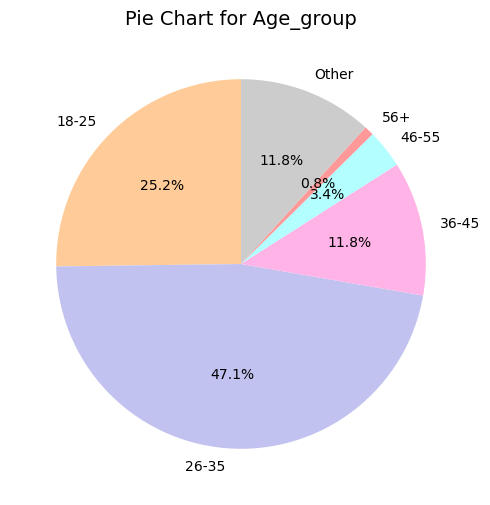

In [10]:
import numpy as np

# Function to map ages into categories
def clean_age_group(value):
    if pd.isna(value):
        return "Other"
    str_val = str(value).strip()
    # Direct match for proper ranges
    if str_val in ["18-25", "26-35", "36-45", "46-55"]:
        return str_val
    # Try converting to int
    try:
        num = int(str_val)
        if 18 <= num <= 25:
            return "18-25"
        elif 26 <= num <= 35:
            return "26-35"
        elif 36 <= num <= 45:
            return "36-45"
        elif 46 <= num <= 55:
            return "46-55"
        elif num > 55:
            return "56+"
        else:
            return "Other"
    except:
        return "Other"

# Apply cleaning
df["age_group_clean"] = df["age_group"].apply(clean_age_group)

# Order for plotting
age_order = ["18-25", "26-35", "36-45", "46-55", "56+", "Other"]

# Count values
age_counts_clean = df["age_group_clean"].value_counts().reindex(age_order, fill_value=0)

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    age_counts_clean,
    labels=age_counts_clean.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#ffcc99", "#c2c2f0", "#ffb3e6", "#b3ffff", "#ff9999", "#cccccc"]
)
plt.title("Pie Chart for Age_group", fontsize=14)
plt.show()


Frequency of GenAI Use:

genai_frequency_use
Daily                  43
A few times a week     37
A few times a month    17
Rarely                  7
Never                   1
Name: count, dtype: int64


/var/folders/vj/tz3h_nsd1mdc2f20mfbm_34w0000gn/T/ipykernel_17743/1340928498.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_counts.index, y=freq_counts.values, palette="viridis")


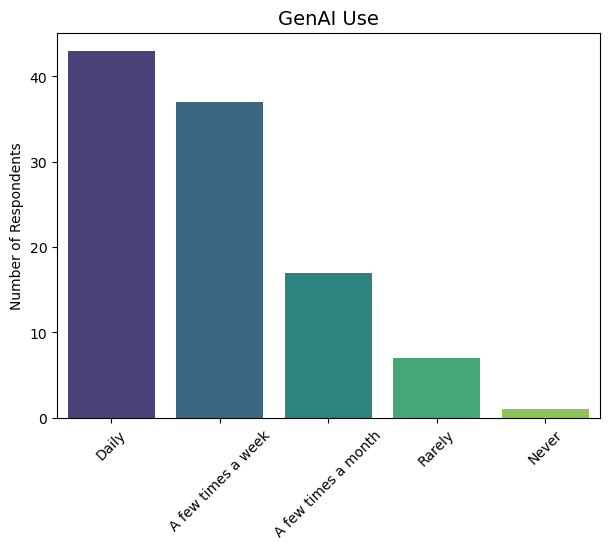

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of GenAI use
freq_counts = df["genai_frequency_use"].value_counts()

print("Frequency of GenAI Use:\n")
print(freq_counts)

# Plot as bar chart
plt.figure(figsize=(7,5))
sns.barplot(x=freq_counts.index, y=freq_counts.values, palette="viridis")
plt.title("GenAI Use", fontsize=14)
plt.ylabel("Number of Respondents")
plt.xlabel("")
plt.xticks(rotation=45)
plt.show()


In [16]:
# Calculate combined count for Daily and A few times a week
combined_count = df[df["genai_frequency_use"].isin(["Daily", "A few times a week"])].shape[0]

# Total sample size
total_count = df.shape[0]

# Percentage
combined_percentage = (combined_count / total_count) * 100

print(f"Combined Daily + Few times a week count: {combined_count}")
print(f"Percentage of total sample: {combined_percentage:.1f}%")
# Categories of interest
remaining_categories = ["Rarely", "A few times a month", "Never"]

# Filter and count
remaining_counts = df["genai_frequency_use"].value_counts().reindex(remaining_categories, fill_value=0)

# Calculate percentages
remaining_percentages = (remaining_counts / df.shape[0]) * 100

# Combine into a DataFrame for easy viewing
remaining_df = pd.DataFrame({
    "Count": remaining_counts,
    "Percentage": remaining_percentages.round(1)
})

print("GenAI Use - Remaining Categories:")
print(remaining_df)



Combined Daily + Few times a week count: 80
Percentage of total sample: 67.2%
GenAI Use - Remaining Categories:
                     Count  Percentage
genai_frequency_use                   
Rarely                   7         5.9
A few times a month     17        14.3
Never                    1         0.8


Most Used GenAI Tools:

                             Tool  Count
0                ChatGPT (OpenAI)     91
1   Google Gemini (formerly Bard)     37
4               Microsoft Copilot     34
2                  GitHub Copilot     24
3              Claude (Anthropic)     19
8                      Midjourney      6
5                        Deepseek      2
7                        DeepSeek      2
6                Google AI Studio      1
9                       Consensus      1
10                          Manus      1
11                           Grok      1
12             Company private AI      1


/var/folders/vj/tz3h_nsd1mdc2f20mfbm_34w0000gn/T/ipykernel_17743/3706171936.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tool_counts_df.head(10), x="Count", y="Tool", palette="coolwarm")


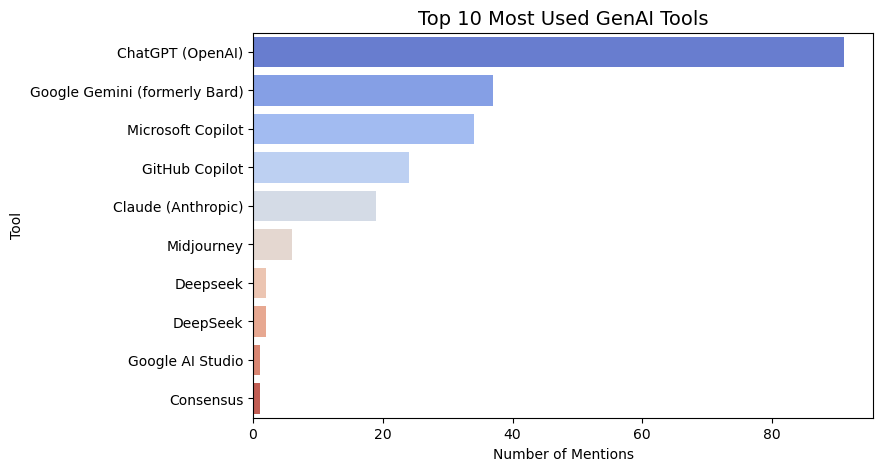

In [13]:
from collections import Counter

# Split the comma-separated tools into individual items and strip spaces
tools_series = df["genai_tools_used"].dropna().apply(lambda x: [t.strip() for t in str(x).split(",")])

# Flatten the list and count frequency
all_tools = [tool for sublist in tools_series for tool in sublist]
tool_counts = Counter(all_tools)

# Convert to DataFrame for easier viewing
tool_counts_df = pd.DataFrame(tool_counts.items(), columns=["Tool", "Count"]).sort_values(by="Count", ascending=False)

print("Most Used GenAI Tools:\n")
print(tool_counts_df)

# Plot the top 10
plt.figure(figsize=(8,5))
sns.barplot(data=tool_counts_df.head(10), x="Count", y="Tool", palette="coolwarm")
plt.title("Top 10 Most Used GenAI Tools", fontsize=14)
plt.xlabel("Number of Mentions")
plt.ylabel("Tool")
plt.show()


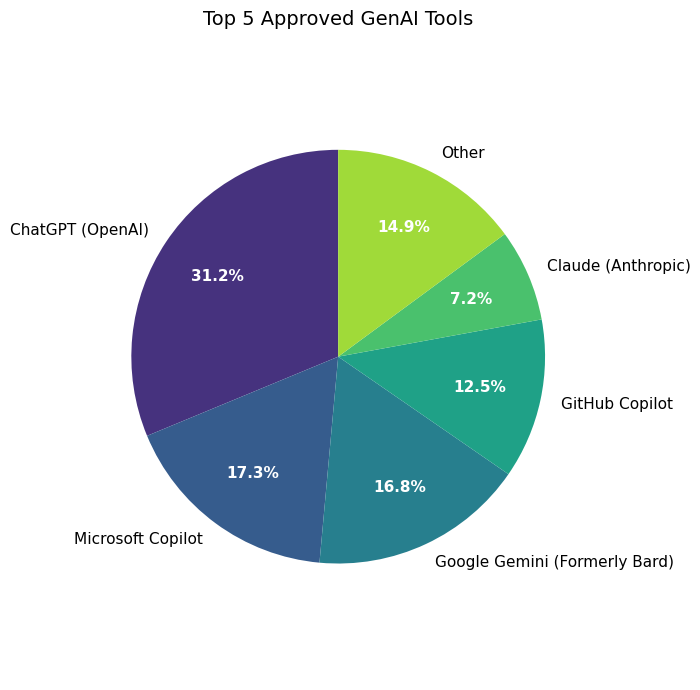

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Build counts from the approval column ---
approved_tools_series = (
    df["genai_org_approval"]
    .dropna()
    .apply(lambda x: [t.strip() for t in str(x).split(",")])
)
approved_tools = [tool for sublist in approved_tools_series for tool in sublist]
approved_counts_df = (
    pd.DataFrame(Counter(approved_tools).items(), columns=["Tool", "Count"])
    .sort_values("Count", ascending=False)
)

# --- Group top N and Others ---
top_n = 5
top_tools_df = approved_counts_df.head(top_n).copy()
other_count = approved_counts_df["Count"].iloc[top_n:].sum()
top_tools_df = pd.concat(
    [top_tools_df, pd.DataFrame({"Tool": ["Other"], "Count": [other_count]})],
    ignore_index=True
)

# --- Colors to match your other chart ---
palette = sns.color_palette("viridis", len(top_tools_df))

# --- Plot pie with separate styling for labels vs percentages ---
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    top_tools_df["Count"],
    labels=top_tools_df["Tool"],          # tool names
    autopct='%1.1f%%',                    # percentages
    startangle=90,
    colors=palette,
    pctdistance=0.7,                      # move % closer to center
)

# Labels (tool names) in black
for t in texts:
    t.set_color('black')
    t.set_fontsize(11)

# Percentages in white + bold
for a in autotexts:
    a.set_color('white')
    a.set_weight('bold')
    a.set_fontsize(11)

plt.title(f"Top {top_n} Approved GenAI Tools", fontsize=14)
plt.axis('equal')  # keep it a circle
plt.tight_layout()
plt.show()
